In [3]:
pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


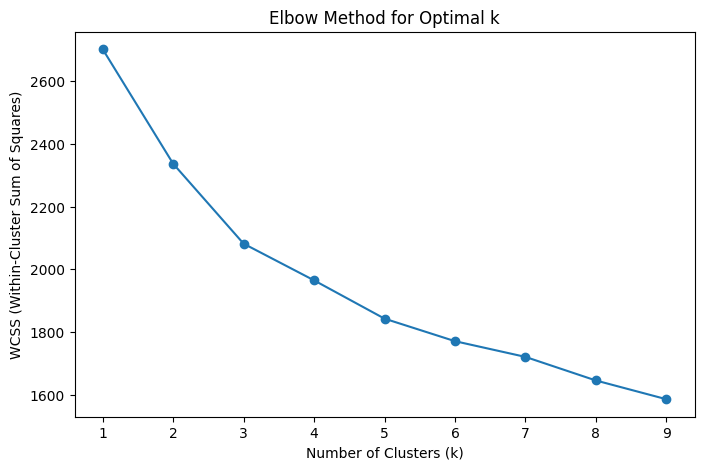

Silhouette Score: 0.150


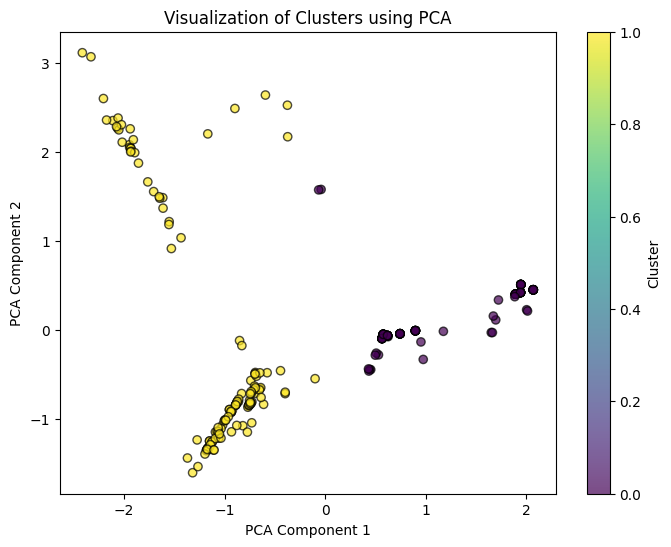

,name,Cluster
0,Some computer science issues in ubiquitous com...,0
1,Computer science: An overview,0
2,Foundations of computer science,0
3,Is computer science science?,0
4,Computer science and its relation to mathematics,0
...,...,...
254,Adaptation strategies for climate change in th...,1
255,Climate change and the historic environment,1
256,Climate change environmental degradation and m...,1
257,Antarctic climate change and the environment,1


In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#nltk.download('stopwords')

df = pd.read_csv("new_dataset.csv")

# Define text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation #re.sub replaces part of the string that matches a regex
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing to the 'name' and 'keywords' columns
df['processed_text'] = df['name'].astype(str) + " " + df['keywords'].astype(str)
df['processed_text'] = df['processed_text'].apply(preprocess_text)

# Convert text data to Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters
optimal_k = 2  

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Compute silhouette score
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualization of Clusters using PCA')
plt.colorbar(label='Cluster')
plt.show()

# Display first few clustered papers
#df[['name', 'Cluster']].head(10)
df[['name', 'Cluster']]

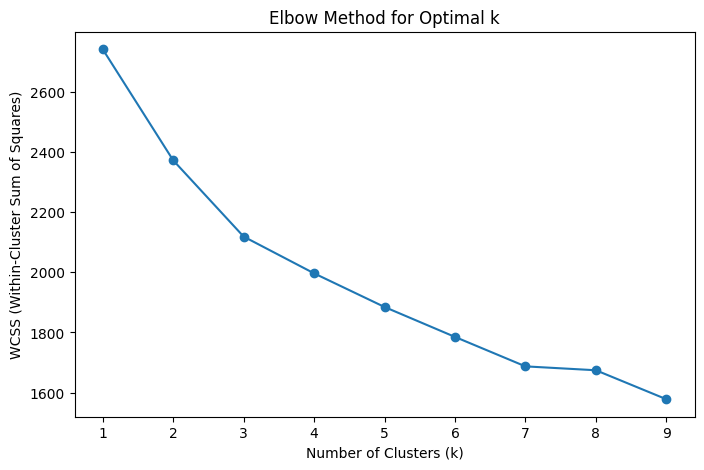

Silhouette Score: 0.178


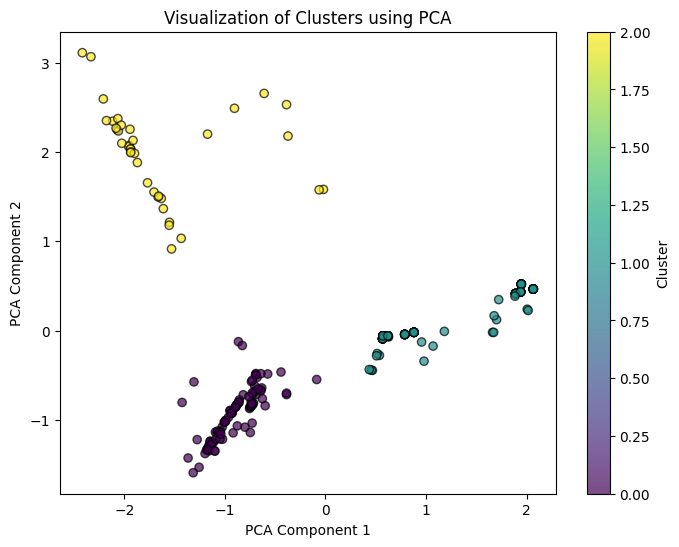

,name,Cluster
0,Some computer science issues in ubiquitous com...,1
1,Computer science: An overview,1
2,Foundations of computer science,1
3,Is computer science science?,1
4,Computer science and its relation to mathematics,1
...,...,...
255,Climate change and the historic environment,2
256,Climate change environmental degradation and m...,2
257,Antarctic climate change and the environment,2
258,Antarctic climate change and the environment: ...,2


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Download stopwords (only needed once)
#nltk.download('stopwords')

# Load dataset
df = pd.read_csv("new_dataset.csv")

# Define text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    lemmatizer = WordNetLemmatizer()
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation #re.sub replaces part of the string that matches a regex
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing to the 'name' and 'keywords' columns
df['processed_text'] = df['name'].astype(str) + " " + df['keywords'].astype(str)
df['processed_text'] = df['processed_text'].apply(preprocess_text)

# Convert text data to Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters (manually determined from the Elbow plot)
optimal_k = 3  # Adjust based on the Elbow curve

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Compute silhouette score
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualization of Clusters using PCA')
plt.colorbar(label='Cluster')
plt.show()

#df[['name', 'Cluster']].head(10)
df[['name', 'Cluster']]
